In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option ('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,\
                             precision_score,\
                             recall_score,\
                             f1_score,\
                             classification_report,\
                             roc_auc_score,roc_curve,auc)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [5]:
data=pd.read_csv(r'C:\Users\anilg\Ds naresh it\vscode\stream_lit\ML Web Apps\Preprocessed_data.csv')
data.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [6]:
x=data.drop('Customer Status',axis=1)
y=data['Customer Status']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


$step-5$

## read the base model

In [8]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

$step-6$

## create the parameter file

In [9]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
# you need to create dictionary with hyper parameters

param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[3,4,5,6,7,8],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
    "random_state":[0,42]
}

# 2*6*3*4*2

$step-7$

##  Apply Grid Search Cv

In [11]:
# now these parameters to apply in a DT model

grid_search=GridSearchCV(grid_tree,
                        param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=True)

In [12]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [13]:
dir(grid_search)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',

$step-8$

## Fit the data

In [14]:
import time
start =time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("total time taken is :",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is : 121.82725286483765


In [15]:
grid_search.best_estimator_    

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=0)

In [16]:
grid_search.best_score_

0.7911075008941972

In [17]:
accuracy_list=cross_val_score(grid_search.best_estimator_ ,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='accuracy')
accuracy_list

array([0.80361757, 0.77648579, 0.78940568, 0.80595084, 0.78007762])

In [18]:
accuracy_list.mean()

0.7911075008941972

In [19]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()   # Base model
DT_params=[keys for keys in grid_tree.get_params()]
print("avialable parameters for model:",DT_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(x_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
Processing parameters are: {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}
best train accuracy: 0.7911075008941972


accuray is: 80.87
F1 is: 85.71
Precision is: 0.88
Recall is: 0.84
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       305
           1       0.88      0.84      0.86       662

    accuracy                           0.81       967
   macro avg       0.78      0.79      0.78       967
weighted avg       0.81      0.81      0.81       967



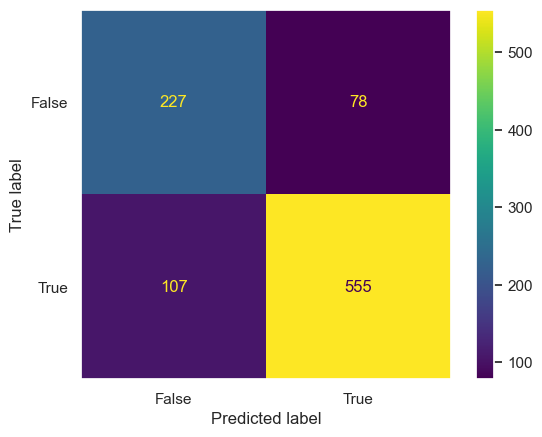

True negative: 227
False postive: 78
False negative: 107
True postive: 555


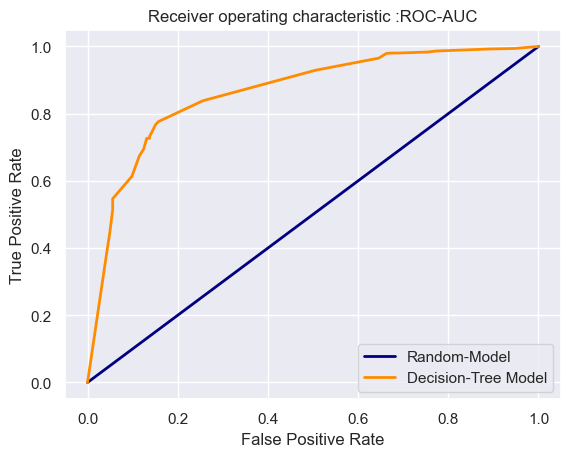

Computed Area Under the Curve (AUC) 0.863416868901986


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(x_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(x_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision-Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

In [21]:
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           0       0.68      0.74      0.71       305
           1       0.88      0.84      0.86       662

    accuracy                           0.81       967
   macro avg       0.78      0.79      0.78       967
weighted avg       0.81      0.81      0.81       967



In [22]:
# Decision tree will provide impartant features also
# Information gain values 
dtree.feature_importances_

array([0.        , 0.08769625, 0.03585805, 0.05987065, 0.01403895,
       0.01557506, 0.18863799, 0.04941705, 0.        , 0.        ,
       0.        , 0.03152153, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41715928, 0.        , 0.        , 0.06704056,
       0.00725393, 0.        , 0.        , 0.00875343, 0.01717728])

In [23]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
final = imp_df.sort_values(by="Importance", ascending=False)
final

# This concept is valid only for DT
# you can use these features top 10 again develop the model
# Dont use these feature in another model

,Feature Name,Importance
21,Contract,0.417159
6,Number of Referrals,0.188638
1,Age,0.087696
24,Monthly Charge,0.067041
3,Number of Dependents,0.059871
7,Tenure in Months,0.049417
2,Married,0.035858
11,Internet Type,0.031522
29,Total Revenue,0.017177
5,Longitude,0.015575


computed Area Under the Curve(AUC) 0.7216135902134615


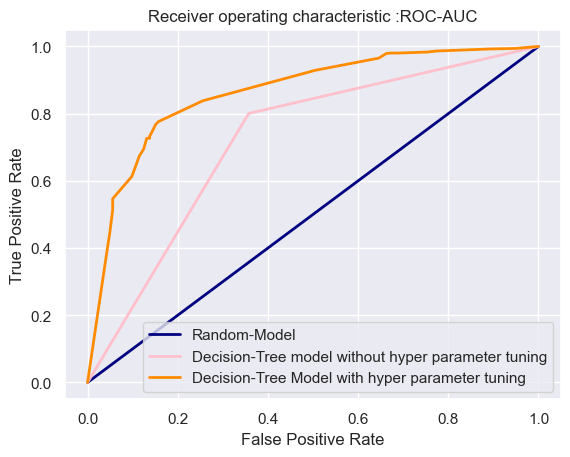

Computed Area Under the Curve (AUC) 0.863416868901986


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


y_pred_dtree=dtree.predict(x_test)




from sklearn.metrics import (accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve,auc)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ac_dt=round(accuracy_score(y_test,y_pred_dtree)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dtree)*100,2)
pr_dt=round(precision_score(y_test,y_pred_dtree)*100,2)
rc_dt=round(recall_score(y_test,y_pred_dtree)*100,2)
                            
 


    
y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot([0,1],[0,1],color="navy",lw=2,label='Random-Model')
plt.plot(fpr,tpr,color="pink",lw=2,label="Decision-Tree model without hyper parameter tuning")
plt.title("Receiver operating characteristic : Roc-AUC")
print("computed Area Under the Curve(AUC)",auc(fpr,tpr))

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(x_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(x_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt)*100,2)
recall_dt=round(recall_score(y_test,y_pred_dt)*100,2)

# ================================Step-7:Confusion matrix=========================================================================



#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision-Tree Model with hyper parameter tuning")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))
